# 1. Ordinary Differential Equations (ODEs)

When dealing with continuous functions using discrete approximations, we often resort to solving ordinary differential equations (ODEs). An ODE can be represented as:

$$
\dot y = \frac{dy}{dt} = f(t,y)
$$

Here, $y \in \mathbb{R}^n$, and $f:\mathbb{R}^{n+1} \rightarrow \mathbb{R}^n$ is a known function. We are interested in finding the solution from time $t=0$ to a final time $T$. To initiate the problem, we have the initial condition $y_0 = y(t=0)$.

To discretize the ODE, we introduce a regular time grid defined as $t_0 = 0, t_1, t_2, \cdots, t_n, \cdots, t_N = T$, where $t_n = n\Delta t$. Here, $\Delta t$ represents the time step, and we have a total of $N+1$ grid points in time, corresponding to $N$ time steps.

Applying the forward difference approximation to the derivative $\dot{y}$ with a step size of $\Delta t$, the ODE can be expressed as:

$$
\frac{y(t_n+\Delta t) - y(t_n)}{\Delta t} = f(t_n,y(t_n))
$$

Rearranging the equation, we find:

$$
y(t_{n+1}) = y(t_n+\Delta t) = y(t_n) + \Delta t f(t_n,y(t_n))
$$

This approach is commonly known as the forward-Euler time stepping method. It provides a rule for transitioning from $y$ at time $t_n$ to $y$ at time $t_{n+1}$. Using $y_n$ to represent the numerical approximation of $y(t_n)$, the time-stepping scheme can be summarized as:

$$
y_{n+1} = y_{n} + \Delta t \, f(t_n, y_n)
$$

By providing the initial condition $y_0 = y(t=0)$, we can iterate this scheme to obtain the approximate solution $y_n$ at later times.

---

Here's an example that demonstrates the application of the forward-Euler time stepping method to solve the simple ODE $\dot{y} = ry$:

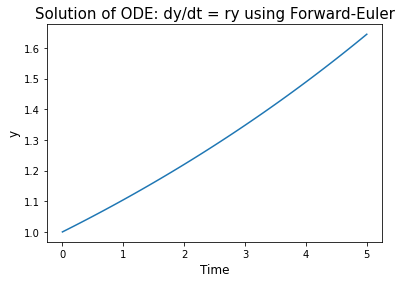

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def forward_euler(y0, r, dt, N):
    
    y = np.zeros(N+1)
    t = np.linspace(0, N*dt, N+1)
    
    y[0] = y0
    
    for n in range(N):
        y[n+1] = y[n] + dt * (r * y[n])
    
    return t, y

# Parameters
y0 = 1    # Initial condition
r = 0.1   # Constant parameter
dt = 0.1  # Time step
N = 50    # Number of time steps

# Solve ODE using forward-Euler method
t, y = forward_euler(y0, r, dt, N)

# Plot the results
plt.plot(t, y)
plt.xlabel('Time', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Solution of ODE: dy/dt = ry using Forward-Euler', fontsize=15)
plt.show()


This code snippet demonstrates how to implement the forward-Euler method to approximate the solution of the ODE $\dot{y} = ry$. The resulting plot shows the variation of $y$ with respect to time, providing an approximate solution to the ODE.

# 2. Black-Scholes formula
The Black-Scholes formulae for value or price of European call and put options are:

$$
C=S N(d_{1})- Ke^{-rT} N(d_{2}) \\
P=Ke^{-rT} N(-d_{2}) - S N(-d_{1})
$$



where:

- $S$ is the spot price of the underlying asset
- $K$ is the strike price
- $T$ is the time to maturity (expressed in years)
- $r$ is the risk free rate (annual rate, expressed in terms of continuous compounding)
- $\sigma$  is the volatility of returns of the underlying asset
- $N(\cdot )$ is the cumulative distribution function of the standard normal distribution

$d_1$ and $d_2$ are given by:
$$
d_{1}={\frac {1}{\sigma \sqrt {T}}}
\left[\ln \left({\frac {S}{K}}\right)+\left(r+{\frac {\sigma ^{2}}{2}}\right)T\right]\\
d_{2}=d_1 - \sigma \sqrt {T} = {\frac {1}{\sigma \sqrt {T}}}
\left[\ln \left({\frac {S}{K}}\right)+\left(r-{\frac {\sigma ^{2}}{2}}\right)T\right]
$$

---
We can write two functions, one that computes and returns the call price and one that computes and returns the put value based on the above formulae. Here's the code:

In [2]:
# Functions that compute European option prices using Black-Scholes formula

# input arguments in all cases are:
# S is the spot price 
# K is the strike price 
# T is the time to strike in years
# r is the risk free rate
# sigma is the volatility 

from scipy.stats import norm

def BS_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2 /2) * T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)

def BS_put(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2 /2) * T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return -S * norm.cdf(-d1) + K * np.exp(-r*T) * norm.cdf(-d2)

Next, we can generate a grid of spot prices over the range $10 \le S \le 200$. For $K=100$, $T=1$, $r=0.05$, and $\sigma = 0.2$, we can also evaluate both options and plot value as a function of $S$. 

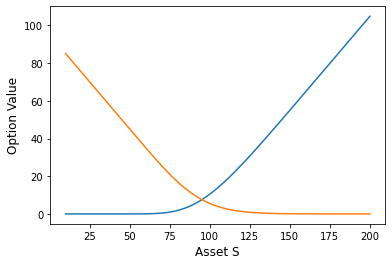

In [3]:
S = np.linspace(10, 200, 101)
C = BS_call(S, K=100, T=1, r=0.05, sigma=0.2)
P = BS_put(S, K=100, T=1, r=0.05, sigma=0.2)

plt.plot(S, C, S, P)
plt.xlabel("Asset S", fontsize=12)
plt.ylabel("Option Value", fontsize=12)
plt.show()

The put-call parity relationship is a fundamental concept in option pricing theory, stating that the price of a European call option and a European put option with the same strike price, underlying asset, and expiration date are related. It can be expressed as:

Call Price - Put Price = Stock Price - Strike Price * e^(-r * Time)

By utilising this relationship, you can create a more advanced function that combines the prices or attributes of call and put options to derive new insights or strategies in option trading or valuation.

Keep in mind that the put-call parity relationship holds for European-style options and assumes a frictionless market with no transaction costs or arbitrage opportunities.

In [4]:
def BS_price(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2 /2) * T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    BS_call = S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
    BS_put = BS_call - S + K * np.exp(-r*T)
    return BS_call, BS_put

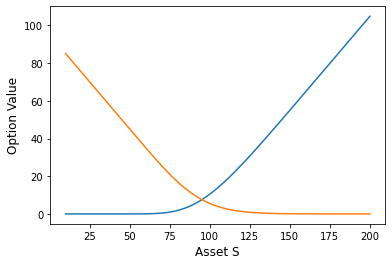

In [5]:
S_price = np.linspace(10, 200, 101)
C_price, P_price = BS_price(S, K=100, T=1, r=0.05, sigma=0.2)

plt.plot(S_price, C_price, S_price, P_price)
plt.xlabel("Asset S", fontsize=12)
plt.ylabel("Option Value", fontsize=12)
plt.show()

# 3. Introduction to Monte Carlo Simulation for Option Pricing

Monte Carlo simulation is a computational technique that uses random sampling to estimate or approximate the solution to complex mathematical or statistical problems. It is particularly useful when analytical or deterministic solutions are difficult or impossible to obtain.

The basic idea behind Monte Carlo simulation is to generate a large number of random samples or scenarios, often following a specific probability distribution, and use these samples to simulate the behavior of a system or calculate various statistical quantities of interest.

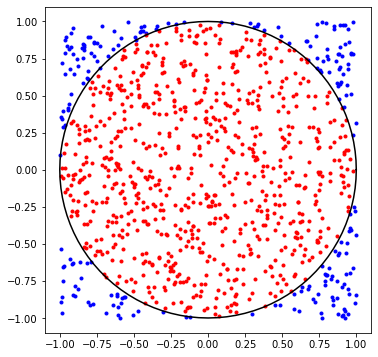

MC approximation to pi based on 1000 samples is 3.116


In [6]:
# set random generator 
rng = np.random.default_rng(12345)

# generate N uniformly distributed random numbers a square [-1,1]x[-1,1]
N = 1000
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)

# plot points with colour determined by the value of r
fig = plt.figure(figsize=(6,6))

r = np.sqrt(x**2 + y**2)
total = 0
for i in range(N):
    if r[i] <= 1:
        plt.plot(x[i], y[i], '.r')
        total += 1
    else:
        plt.plot(x[i], y[i], '.b')

# plot unit circle
t = np.linspace(0, 2*np.pi, 101)
plt.plot(np.cos(t), np.sin(t), 'k')

plt.axis('square')
plt.show()

my_pi = 4 * (total/N)

print("MC approximation to pi based on", N, "samples is", my_pi)

In the provided code example, Monte Carlo simulation is used to estimate the value of $\pi$ by generating random points within a square and determining the proportion of points that fall within the unit circle. **The more points (N) generated, the more accurate the approximation of $\pi$ becomes.**

---

To illustrate the Monte Carlo approach for option pricing, let's consider a simplified example where the underlying asset, denoted as $S_t$, follows a geometric Brownian motion. The dynamics of the asset are given by the stochastic differential equation:

$$
dS_t = r S_t dt + \sigma S_t dW_t
$$

Here, $r$ represents the risk-free interest rate, $\sigma$ is the volatility of the asset, $t$ denotes time, and $W_t$ is a Wiener process.

At the expiration of the option, the distribution of asset prices can be described as:
$$
S_T = S_0 exp( (r-\frac{1}{2}\sigma^2)T + \sigma \sqrt{T} X)
$$

In this equation, $S_0$ is the initial price of the asset, $T$ represents the expiration time, and $X \sim N(0, 1)$ follows a standard normal distribution.

For a European call option, the payoff at expiration is given by:

$$
f(S_T) = e^{-r T} max(S_T - K, 0)
$$

where $K$ is the strike price. 

We can calculate the option value by taking the expected discounted payoff:

$$
V = E[f(S_T)]
$$

---

The `Monte_carlo_European_call` function generates a random variable $X$ from a standard normal distribution and simulates the asset prices at the expiration of the option $S_T$. This simulation allows us to obtain a set of $N$ possible asset prices. We can then plot the probability density function(PDF) of $S_T$. Here's the code:

In [7]:
def Monte_carlo_European_call(S, K, T, r, sigma, N):
    
    # initial asset price
    S0 = S 
    
    # X follows a standard normal dist.
    X = rng.normal(0, 1, N)
    
    # the distribution of asset prices at the expiration of the option
    S_T = S0 * np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*X)
    
    # the payoff of european call option at expiration
    fS_T = np.exp(-r*T) * np.maximum(S_T-K, 0)
    
    # the option value by taking the expected discounted payoff
    value = np.mean(fS_T)
    
    return value

In [8]:
# Parameters
S = 140
K = 110
T = 1
r = 0.05
sigma = 0.3
N = 10**4

# Calculate option prices using Monte Carlo and Black-Scholes methods
MC_price = Monte_carlo_European_call(S, K, T, r, sigma, N)
BS_price = BS_call(S, K, T, r, sigma)

# Display the results
print("The expected discounted payoff from Monte Carlo: ", round(MC_price, 4))
print("The expected discounted payoff from Black-Scholes: ", round(BS_price, 4))

The expected discounted payoff from Monte Carlo:  38.7388
The expected discounted payoff from Black-Scholes:  38.541


As demonstrated by the calculations above, the expected discounted payoff from both the Monte Carlo and Black-Scholes methods are remarkably close for the given option parameters.

This close alignment of results suggests that the Monte Carlo method can be a highly useful and reliable alternative approach to calculate option payoffs, especially in cases where analytical solutions like the Black-Scholes formula may not be readily available or applicable.

Monte Carlo simulations offer flexibility in handling complex derivative instruments and can be adapted to various market conditions. However, it's essential to consider that the accuracy and convergence of Monte Carlo simulations depend on the number of simulated paths (N) and the appropriate choice of random number generators.

In conclusion, both methods provide valuable tools for option pricing, and the choice between them may depend on factors such as computational resources, market scenarios, and the complexity of the derivative instrument under consideration. Understanding and utilizing both techniques can empower financial professionals to make more informed investment decisions.

By combining the strengths of both analytical and simulation-based methods, investors and analysts can gain a deeper understanding of financial markets and better manage risk exposure.

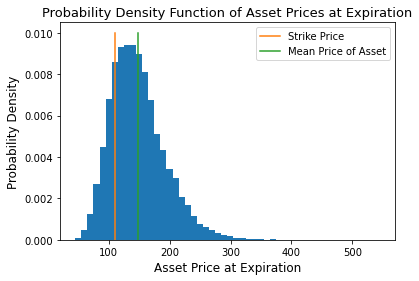

The Mean of Asset Price at Expiration:  147.7774


In [9]:
# Parameters
S = 140
K = 110
T = 1
r = 0.05
sigma = 0.3
N = 10**4


# set initial condition
S0 = S

X = rng.normal(0, 1, N)
S_T = S0 * np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*X)

plt.hist(S_T, bins=50, density=True)
plt.xlabel("Asset Price at Expiration", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.title("Probability Density Function of Asset Prices at Expiration", fontsize=13)

# vertical line at strike price
plt.plot([K, K], [0, 0.01], )
plt.plot([np.mean(S_T), np.mean(S_T)], [0, 0.01])
plt.legend(["Strike Price", "Mean Price of Asset"])

plt.show()

print("The Mean of Asset Price at Expiration: ", np.round(np.mean(S_T), 4))

This code conducts a Monte Carlo simulation to model the potential distribution of asset prices at expiration, offering valuable insights for option pricing and risk analysis. The histogram and vertical lines provide a visual representation of the simulated outcomes, allowing for a better understanding of the underlying asset's behavior.